# Instacart Dataset 2017 - Exploration and Analysis

Instacart is a popular app used for grocery ordering and delivery. They make it quite easy for you to fill your refrigerator and pantry with favorite produce, anytime you need them. In 2017, they published a Kaggle competition which challenged the Data Science community to create a powerfull recommendation system for their customers. They published an anonymized dataset that contained a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, they provided between 4 and 100 of their orders, with the sequence of products purchased in each order. Furthermore, they provided the week and hour of day the order was placed, and a relative measure of time between orders. Quite an impressive dataset! 

I was curious enough to explore and analyse the dataset. However, I will leave out the recommender system part for another time.

The structure of this notebook is organized as follows:

<ul>
    <li>1. Imports</li>
    <li>2. Data</li>
        <ul>
            <li>2.1 Orders Dataset</li>
            <li>2.2 Products Dataset</li>
            <li>2.3 Aisles Dataset</li>
            <li>2.4 Departments Dataset</li>
            <li>2.5 Order Products Dataset</li>
            <li>2.6 Merging Dataframes</li>
        </ul>
    <li>3. Business Case</li>
        <ul>
            <li>3.1 What is the structure of our data?</li>
            <li>3.2 When do people place their orders?</li>
            <li>3.3 How many orders are there per customer?</li>
            <li>3.4 How often do customers reorder?</li>
            <li>3.5 Which products are frequently ordered?</li>
            <li>3.6 Which products are usually reordered?</li>
            <li>3.7 What is the proportion between reordered and newly ordered items?</li>
            <li>3.8 How many products are there in the cart usually?</li>
            <li>3.9 What are the most popular aisles per products ordered?</li>
            <li>3.10 What is the share of orders per aisle?</li>
            <li>3.11 What are the most popular departments?</li>
            <li>3.12 What is the share of orders per department?</li>
        </ul>
</ul>

# 1. Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
import missingno as msno

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

In [2]:
#loading data
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')
order_products_train = pd.read_csv('data/order_products_train.csv')

**Converting float64 and int64 to 32 bit for memory usage**

In [3]:
#creating a function that converts 64-bit to 32-bit nums
def size64_to_size32(df):
    """
    It converts all 64-bit floats and integers to 32-bit
    """
    for c in df.columns:
        if df[c].dtypes == 'int64':
            df[c] = df[c].astype(np.int32)
        if df[c].dtypes == 'float64':
            df[c] = df[c].astype(np.float32)

In [4]:
size64_to_size32(orders)
size64_to_size32(products)
size64_to_size32(aisles)
size64_to_size32(departments)
size64_to_size32(order_products_train)

## 2.1 Orders Dataset

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int32  
 4   order_dow               int32  
 5   order_hour_of_day       int32  
 6   days_since_prior_order  float32
dtypes: float32(1), int32(5), object(1)
memory usage: 104.4+ MB


In [7]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', orders.isnull().values.sum())
print('Percent of missing values per feature: ') 
orders.isnull().sum() * 100 / len(orders)

Number of missing values:  206209
Percent of missing values per feature: 


order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

<AxesSubplot:>

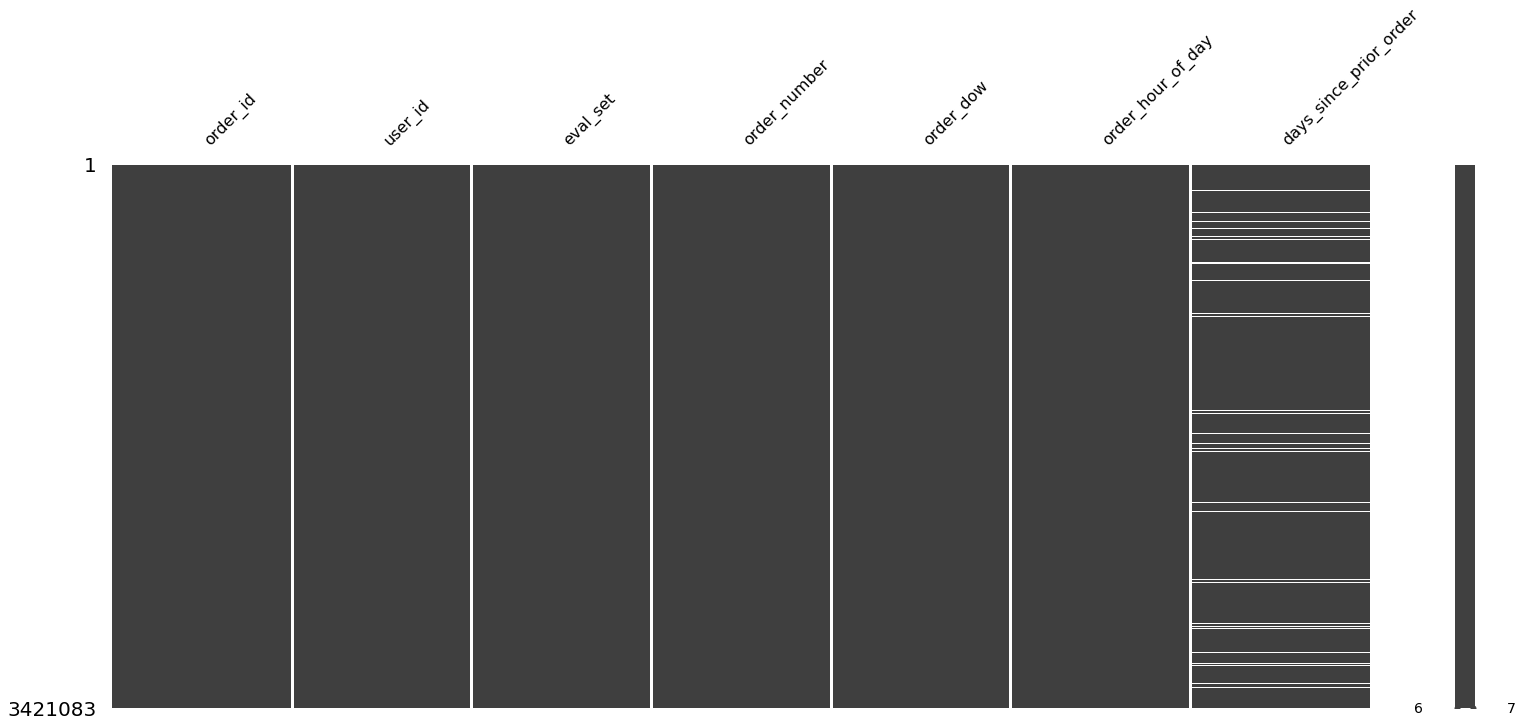

In [8]:
msno.matrix(orders)

## 2.2 Products Dataset

In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int32 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int32 
 3   department_id  49688 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 970.6+ KB


In [11]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', products.isnull().values.sum())
print('Percent of missing values per feature: ') 
products.isnull().sum() * 100 / len(products)

Number of missing values:  0
Percent of missing values per feature: 


product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

## 2.3 Aisles Dataset

In [12]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int32 
 1   aisle     134 non-null    object
dtypes: int32(1), object(1)
memory usage: 1.7+ KB


In [14]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', aisles.isnull().values.sum())
print('Percent of missing values per feature: ') 
aisles.isnull().sum() * 100 / len(aisles)

Number of missing values:  0
Percent of missing values per feature: 


aisle_id    0.0
aisle       0.0
dtype: float64

## 2.4 Departments Dataset

In [15]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int32 
 1   department     21 non-null     object
dtypes: int32(1), object(1)
memory usage: 380.0+ bytes


In [17]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', departments.isnull().values.sum())
print('Percent of missing values per feature: ') 
departments.isnull().sum() * 100 / len(departments)

Number of missing values:  0
Percent of missing values per feature: 


department_id    0.0
department       0.0
dtype: float64

## 2.5 Order Products Dataset

In [18]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int32
 1   product_id         1384617 non-null  int32
 2   add_to_cart_order  1384617 non-null  int32
 3   reordered          1384617 non-null  int32
dtypes: int32(4)
memory usage: 21.1 MB


In [20]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', order_products_train.isnull().values.sum())
print('Percent of missing values per feature: ') 
order_products_train.isnull().sum() * 100 / len(order_products_train)

Number of missing values:  0
Percent of missing values per feature: 


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

## 2.6 Merging dataframes

In [21]:
#merging products with aisles, departments, and order_products_train
products = pd.merge(aisles, products, on='aisle_id')
products = pd.merge(departments, products, on='department_id')
products = pd.merge(order_products_train, products, on='product_id')

In [22]:
#merging products and orders
products_and_orders = pd.merge(products, orders, on='order_id')

In [23]:
products.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,1,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
1,816049,49302,7,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
2,1242203,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
3,1383349,49302,11,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
4,1787378,49302,8,0,16,dairy eggs,120,yogurt,Bulgarian Yogurt


In [24]:
products_and_orders.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt,112108,train,4,4,10,9.0
1,1,11109,2,1,16,dairy eggs,108,other creams cheeses,Organic 4% Milk Fat Whole Milk Cottage Cheese,112108,train,4,4,10,9.0
2,1,10246,3,0,4,produce,83,fresh vegetables,Organic Celery Hearts,112108,train,4,4,10,9.0
3,1,49683,4,0,4,produce,83,fresh vegetables,Cucumber Kirby,112108,train,4,4,10,9.0
4,1,43633,5,1,15,canned goods,95,canned meat seafood,Lightly Smoked Sardines in Olive Oil,112108,train,4,4,10,9.0


# 3. Business Case Data Analysis


    3.1 What is the structure of our data?
    3.2 When do people place their orders?
    3.3 How many orders are there per customer?
    3.4 How often do customers reorder?
    3.5 Which products are frequently ordered?
    3.6 Which products are usually reordered?
    3.7 What is the proportion between reordered and newly ordered items?
    3.8 How many products are there in the cart usually?
    3.9 What are the most popular aisles per products ordered?
    3.10 What is the share of orders per aisle?
    3.11 What are the most popular departments?
    3.12 What is the share of orders per department?
    
- Most of the purchases are being made on days 0 and 1 (around 120K more orders are placed on these days). An assumption is made these days are Saturday and Sunday. There isn't a significant difference in number of orders on other days.
- Most orders are placed between 9am and 5pm
- Most orders are placed on the weekends between 10am and 16pm
- Most users make between 4 and 10 orders
- People usually order after 7 days, or after 30 days (NOTE: the data for days_since_prior_order was capped at 30)
- The number of products in the basket is between 5 and 7 for the majority of orders
- Top 12 added to cart products rule Banana as number one. The majority of products are fruits, mostly organic.
- Top 12 reordered products tell a similar story: the number one is Banana, followed by fruit, mostly organic.
- There are usually 1 to 6 items in the basket per order
- The proportion of reordered items is greater at almost 60%, which indicates the habit of ordering the same items
- The highest share of orders belong to the fresh fruits and fresh vegetables equally 22.4%, followed by packaged vegetable fruits, and yogurt.
- The highest share of orders belongs to the produce department 31.8%, followed by the dairy eggs department, and the snacks department.

## 3.1 What is the structure of our data?

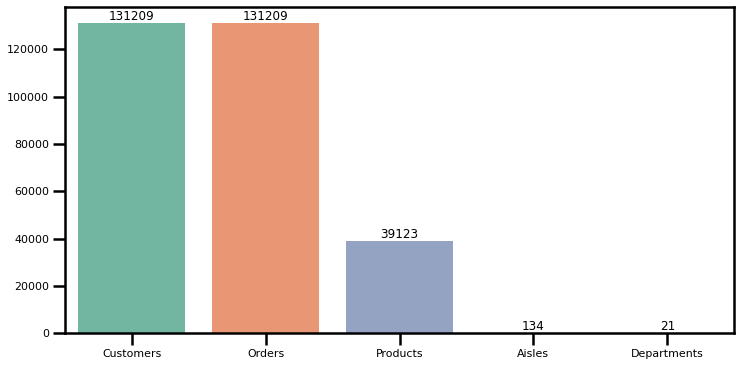

In [41]:
#visualizing the number of customers, orders, aisles, and products
data = {'Customers': len(products_and_orders.user_id.unique()),
        'Orders': len(products_and_orders.order_id.unique()),
        'Products': len(products_and_orders.product_id.unique()),
        'Aisles': len(products_and_orders.aisle_id.unique()),
        'Departments': len(products_and_orders.department_id.unique())}
data_structure = pd.DataFrame(data, index=[0])

plt.figure(figsize=(12,6))
ax = sns.barplot(data = data_structure, palette = 'Set2')
ax.bar_label(ax.containers[0]);

## 3.2 When do people place their orders?

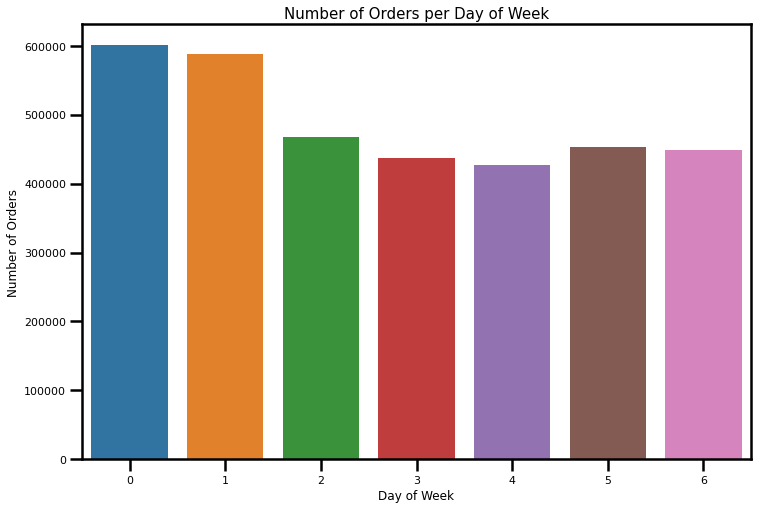

In [26]:
#number of orders by day of week

plt.figure(figsize=(12,8))
sns.countplot(orders['order_dow'])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Number of Orders per Day of Week', fontsize=15);

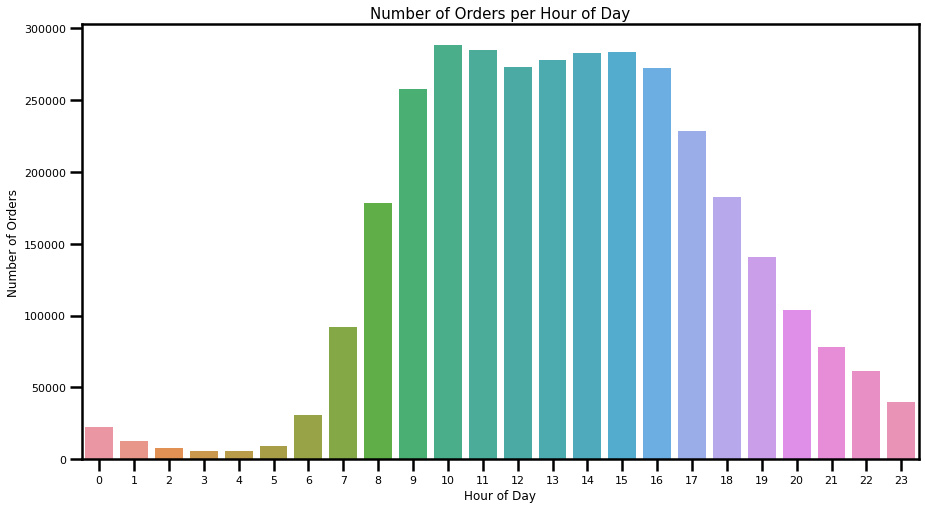

In [27]:
#at what hour do people order the most

plt.figure(figsize=(15,8))
sns.countplot(orders['order_hour_of_day'])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.title('Number of Orders per Hour of Day', fontsize=15);

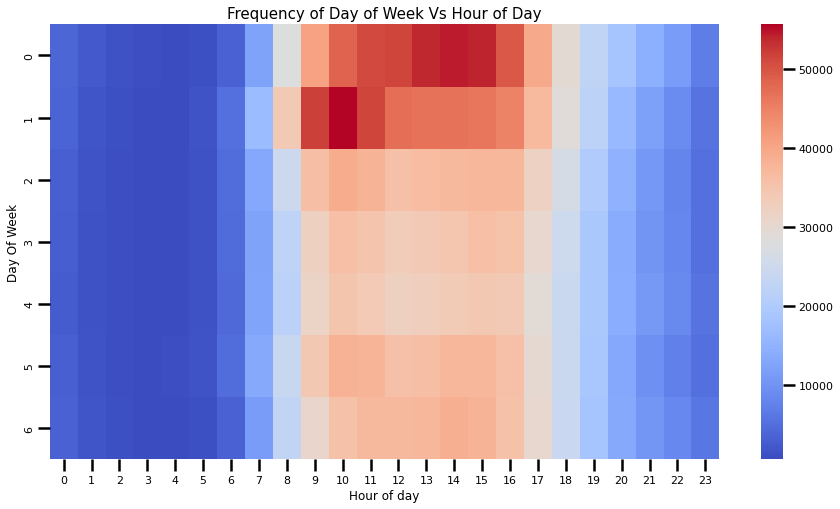

In [28]:
#frequency of orders per weekday and its hour

days_hours = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
days_hours = days_hours.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,8))
sns.heatmap(days_hours, cmap='coolwarm')
plt.title('Frequency of Day of Week Vs Hour of Day', fontsize=15)
plt.ylabel('Day Of Week', fontsize = 12)
plt.xlabel('Hour of day', fontsize = 12)
plt.show()

## 3.3 How many orders are there per customer?

In [29]:
orders.groupby('user_id')['order_id'].nunique().describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

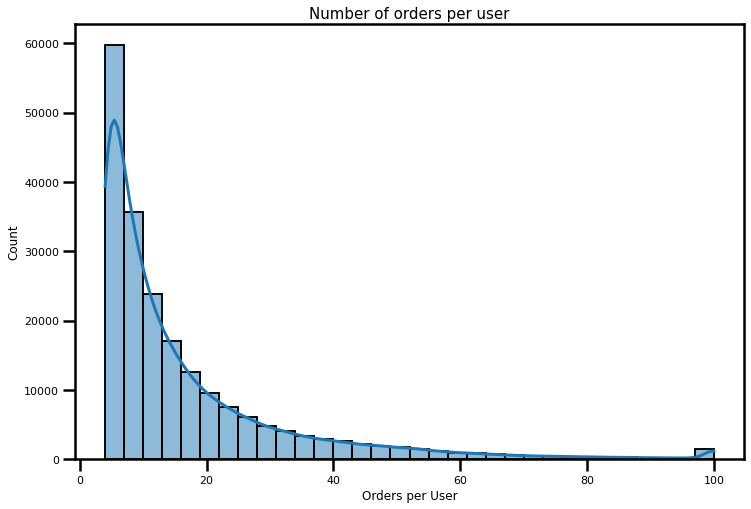

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(orders.groupby('user_id')['order_id'].nunique(), binwidth=3, kde = True, palette = 'Set2')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Orders per User', fontsize=12)
plt.title('Number of orders per user', fontsize=15)
plt.show();

## 3.4 How often do customers reorder?

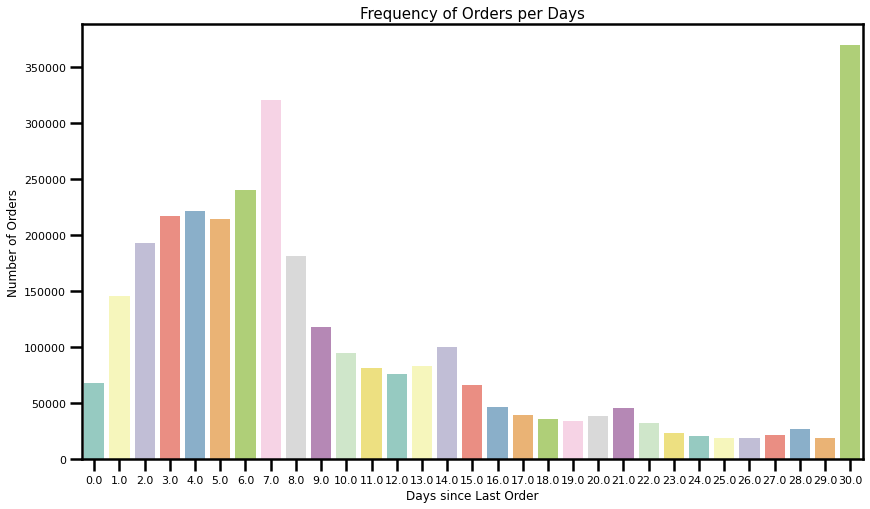

In [31]:
plt.figure(figsize=(14,8))
sns.countplot(orders['days_since_prior_order'], palette = 'Set3')
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Days since Last Order', fontsize=12)
plt.title('Frequency of Orders per Days', fontsize=15)
plt.show();

## 3.5 Which products are frequently ordered?

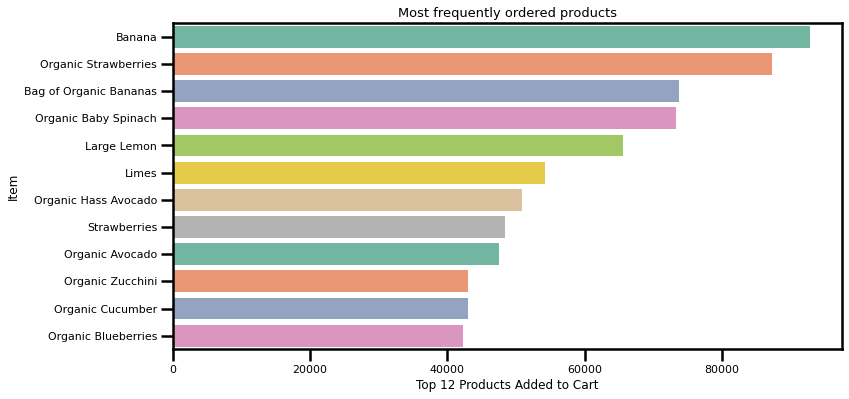

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data = products.groupby('product_name')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:12], 
            x = 'add_to_cart_order', y = 'product_name', palette = 'Set2')
plt.ylabel('Item', fontsize=12)
plt.xlabel('Top 12 Products Added to Cart', fontsize=12)
plt.title('Most frequently ordered products', fontsize=13)
plt.show();

## 3.6 Which products are usually reordered?

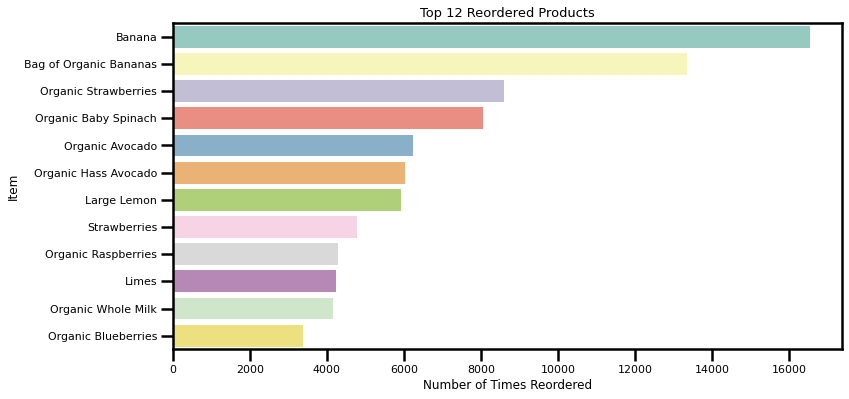

In [33]:
#visualizing top 12 products that were reordered

plt.figure(figsize=(12,6))
sns.barplot(data = products.groupby('product_name')['reordered'].sum().sort_values(ascending = False).reset_index()[0:12], 
            x = 'reordered', y = 'product_name', palette = 'Set3')
plt.ylabel('Item', fontsize=12)
plt.xlabel('Number of Times Reordered', fontsize=12)
plt.title('Top 12 Reordered Products', fontsize=13)
plt.show();

## 3.7 What is the proportion between reordered and newly ordered items?

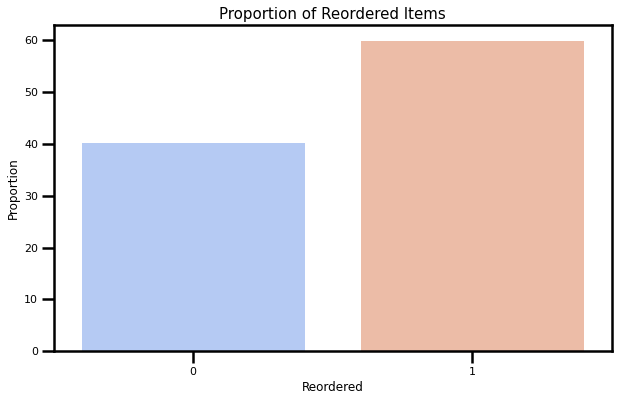

In [34]:
#visualizing the proportion of reordered items

prop_reorder = order_products_train.groupby('reordered')['add_to_cart_order'].count().reset_index()
prop_reorder['proportion'] = prop_reorder['add_to_cart_order'] * 100 / order_products_train['add_to_cart_order'].count()

plt.figure(figsize=(10,6))
sns.barplot(data = prop_reorder, x='reordered', y='proportion', palette='coolwarm')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Reordered', fontsize=12)
plt.title('Proportion of Reordered Items', fontsize=15)
plt.show();

## 3.8 How many products are there in the cart usually?

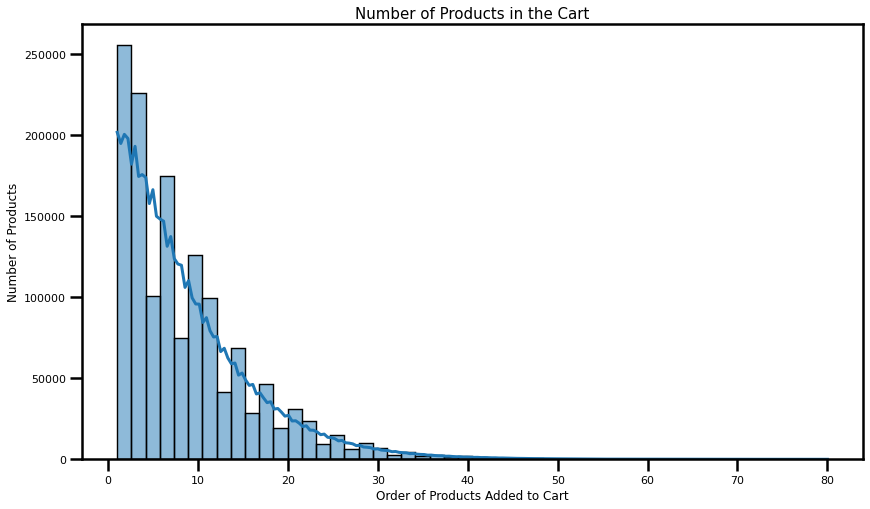

In [35]:
#visualizing how many products are there in the basket usually

products_per_order = order_products_train.groupby('order_id')['add_to_cart_order'].max().reset_index()

plt.figure(figsize=(14,8))
sns.histplot(order_products_train['add_to_cart_order'], bins = 50, kde = True)
plt.ylabel('Number of Products', fontsize=12)
plt.xlabel('Order of Products Added to Cart', fontsize=12)
plt.title('Number of Products in the Cart', fontsize=15)
plt.show();

## 3.9 What are the most popular aisles per products ordered?

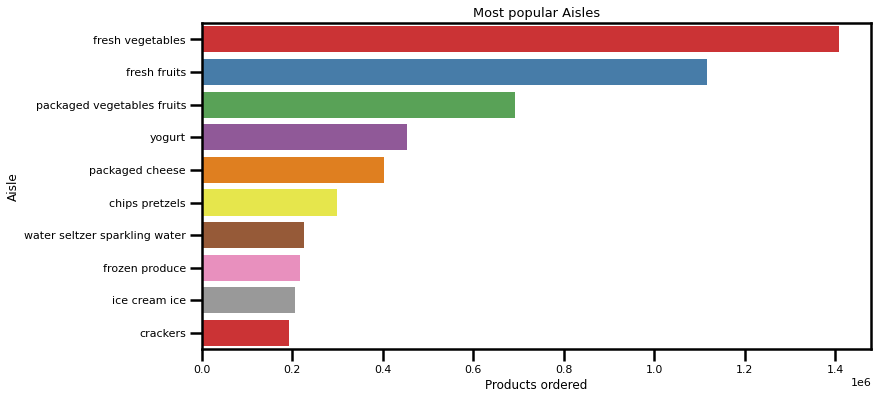

In [36]:
#visualizing most popular aisles per products ordered

plt.figure(figsize=(12,6))
sns.barplot(data = products_and_orders.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], 
            x = 'add_to_cart_order', y = 'aisle', palette = 'Set1')
plt.ylabel('Aisle', fontsize=12)
plt.xlabel('Products ordered', fontsize=12)
plt.title('Most popular Aisles', fontsize=13)
plt.show();

## 3.10 What is the share of orders per aisle?

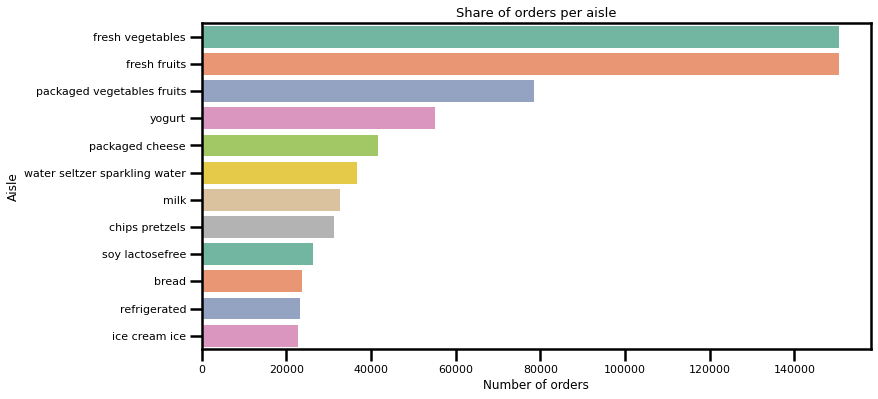

In [37]:
top_aisle = products.groupby('aisle')['order_id'].count().reset_index()
top_aisle = top_aisle.nlargest(12,'order_id')

plt.figure(figsize=(12,6))
sns.barplot(data = top_aisle, x = 'order_id', y = 'aisle', palette = 'Set2')
plt.ylabel('Aisle', fontsize=12)
plt.xlabel('Number of orders', fontsize=12)
plt.title('Share of orders per aisle', fontsize=13)
plt.show();

## 3.11 What are the most popular departments?

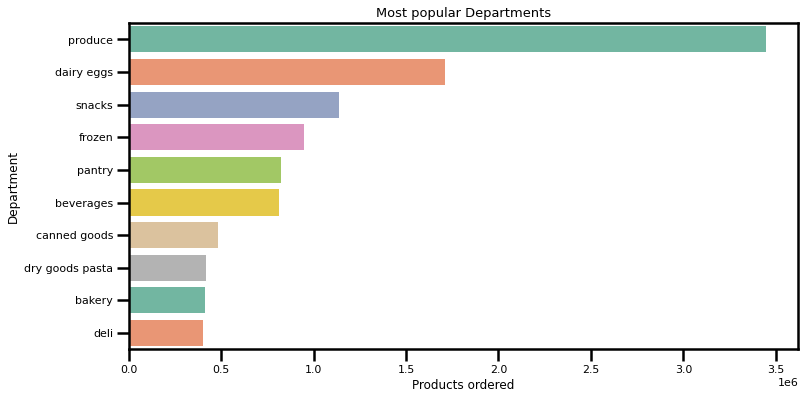

In [38]:
# most popular departments in terms of units ordered

plt.figure(figsize=(12,6))
sns.barplot(data = products_and_orders.groupby('department')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], 
            x = 'add_to_cart_order', y = 'department', palette = 'Set2')
plt.ylabel('Department', fontsize=12)
plt.xlabel('Products ordered', fontsize=12)
plt.title('Most popular Departments', fontsize=13)
plt.show();

## 3.12 What is the share of orders per department?

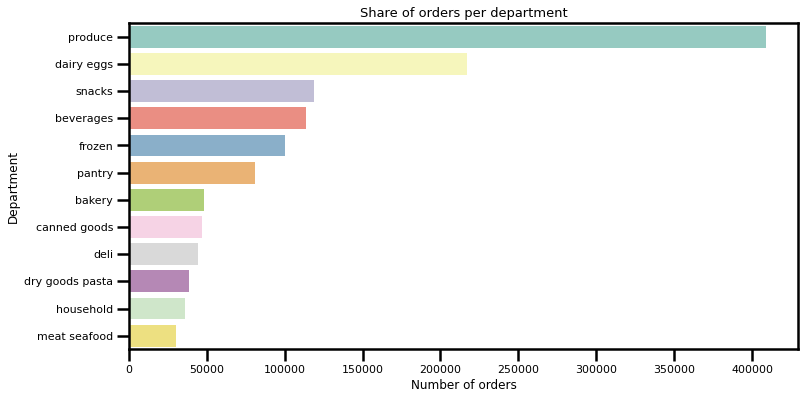

In [39]:
#visualizing the share of orders per department

top_dep = products.groupby('department')['order_id'].count().reset_index()
top_dep = top_dep.nlargest(12,'order_id')

plt.figure(figsize=(12,6))
sns.barplot(data = top_dep, x = 'order_id', y = 'department', palette = 'Set3')
plt.ylabel('Department', fontsize=12)
plt.xlabel('Number of orders', fontsize=12)
plt.title('Share of orders per department', fontsize=13)
plt.show();